1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



<IPython.core.display.Javascript object>


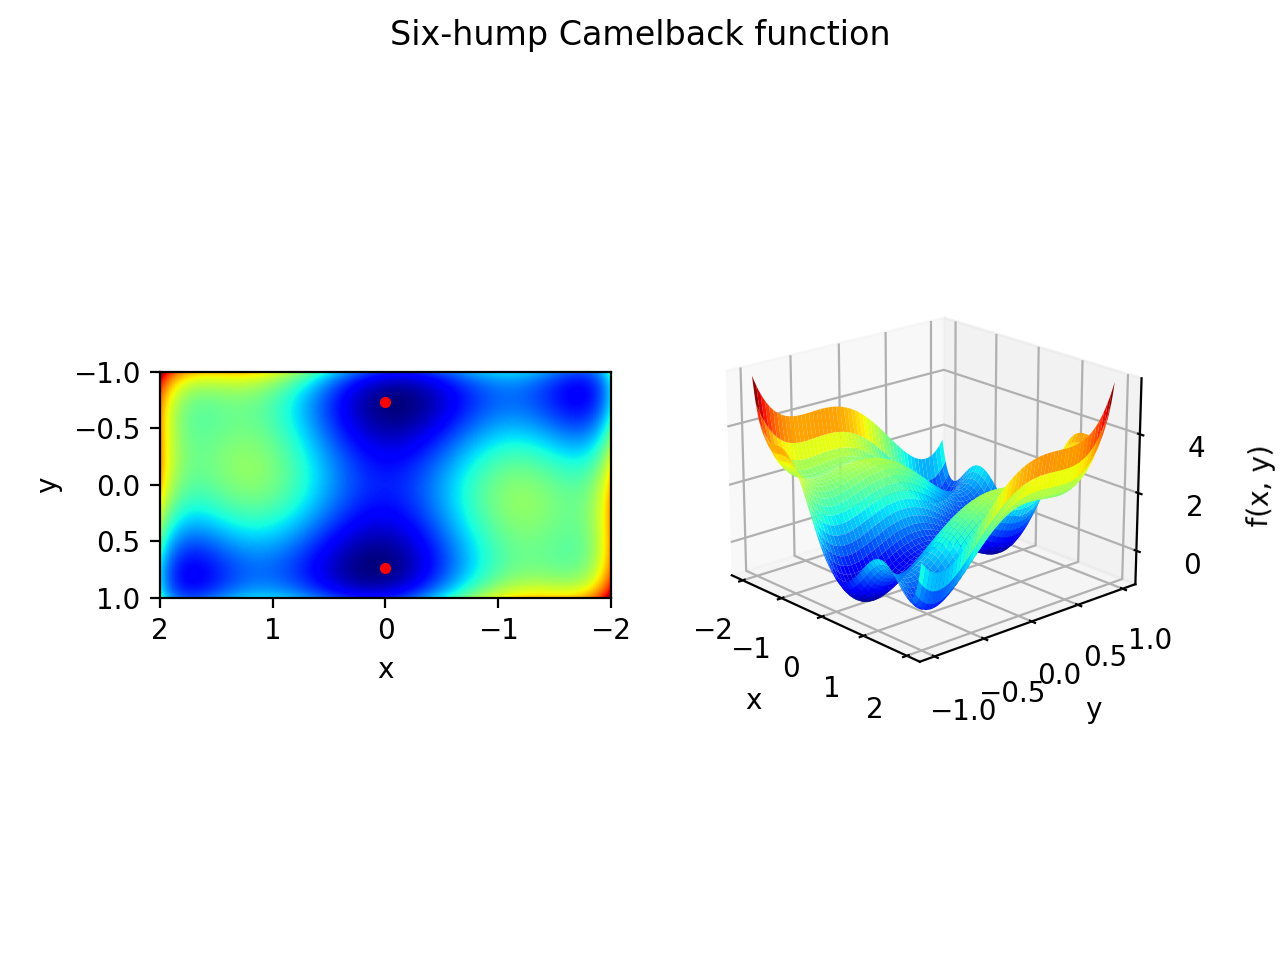

Minima:
[0.] [-0.73649881]
[0.] [0.7364988]


In [107]:
def camelback(x,y):
    return (4 - 2.1 * x**2 + (x**4)/3)*x**2 +x*y +(4*y**2 -4)*y**2

x=np.linspace(-2,2,300)
y=np.linspace(-1,1,300)

# optimization x
optimization = optimize.minimize(camelback, [0], args=(0,)) 
best_x = optimization.x

# optimization y
optimization = optimize.minimize(lambda x,y: camelback(y,x), [0], args=(0.5,))
best_y1 = optimization.x

optimization = optimize.minimize(lambda x,y: camelback(y,x), [0], args=(-0.5,))
best_y2 = optimization.x


fig=plt.figure()
fig.suptitle('Six-hump Camelback function')
ax1=fig.add_subplot(1, 2, 2, projection='3d')
ax2=fig.add_subplot(1, 2, 1)

xx,yy=np.meshgrid(x,y)
zz=camelback(xx,yy)

ax1.plot_surface(xx,yy,zz,cmap=plt.cm.jet)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')


ax2.imshow(camelback(xx,yy),cmap=plt.cm.jet,extent=[2, -2, 1, -1])
ax2.scatter([best_x], [best_y1], c='r',marker='.');
ax2.scatter([best_x], [best_y2], marker='.',c='r')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

print('Minima:')
print(best_x, best_y1)
print(best_x, best_y2)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

<IPython.core.display.Javascript object>


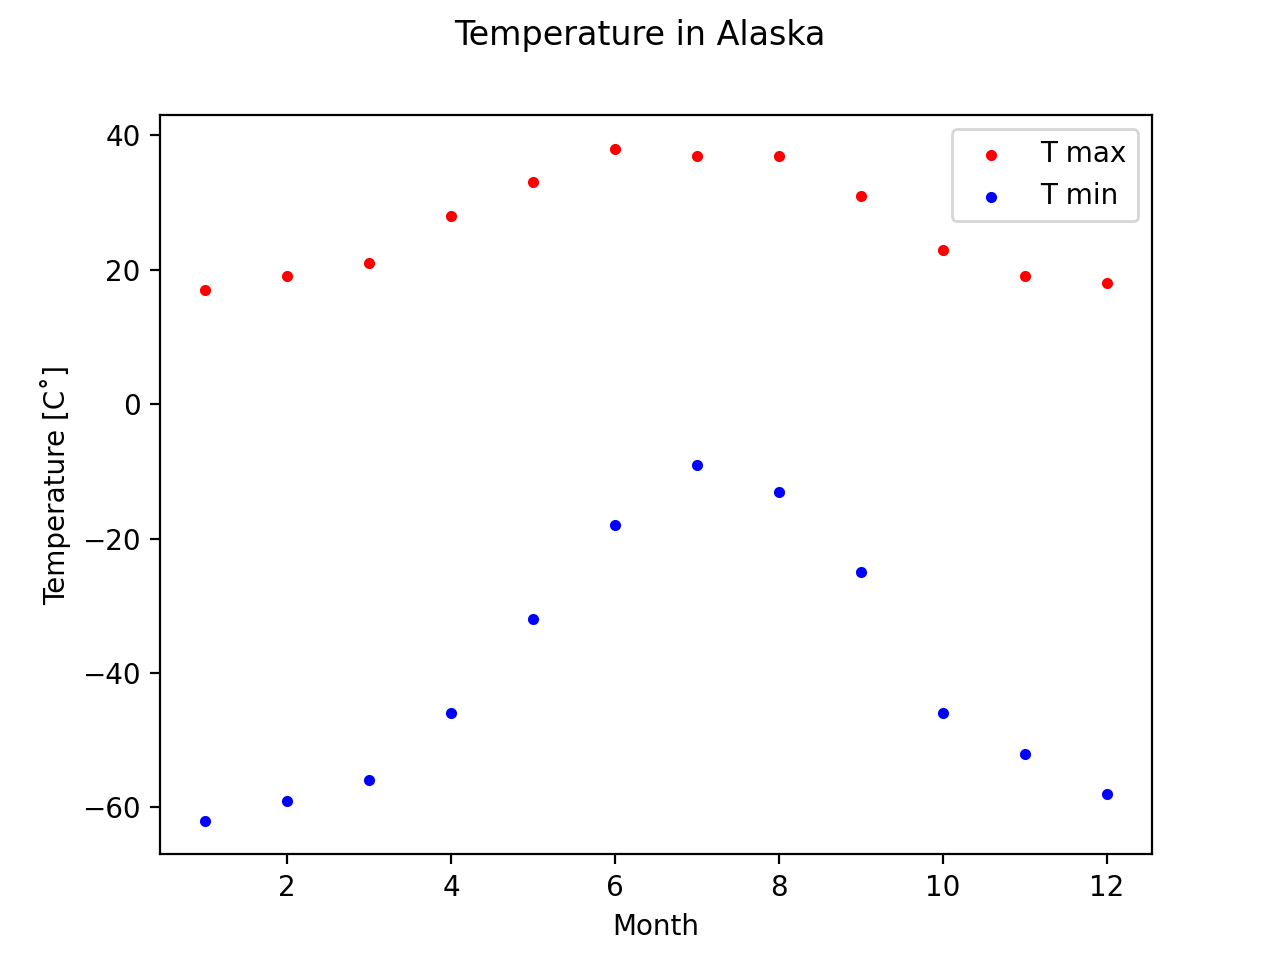

Text(0, 0.5, 'Temperature [C˚]')

In [138]:
from scipy.interpolate import interp1d

month=list(i for i in range(1,13))
t_max=(17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18)
t_min=(-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58)


cubic_interp_max = interp1d(month, t_max, kind='cubic')
cubic_interp_min = interp1d(month, t_min, kind='cubic')
interpolation_x = np.linspace(1, 12, 100)
cubic_results_max = cubic_interp_max(interpolation_x)
cubic_results_min = cubic_interp_min(interpolation_x)


fig=plt.figure()
fig.suptitle('Temperature in Alaska')
ax=fig.add_subplot()

ax.scatter(month,t_max, marker='.',c='r',label='T max')
#ax.plot(interpolation_x, cubic_results_max, c='orange', alpha=0.7)

ax.scatter(month,t_min, marker='.',c='b',label='T min')
#ax.plot(interpolation_x, cubic_results_min, c='cyan', alpha=0.7)

ax.legend(loc='best')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature [C˚]')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [3]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


--2021-12-16 18:13:05--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-16 18:13:06--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc5a9b0f72613b1556c043f06c6.dl.dropboxusercontent.com/cd/0/inline/Bb9liLgvGLLDE3osmAbLj0oOxKI9Um_gSJWW2vhYLzCSb-6c65g18XMUm1uoIT6e4NQyaZbZHV1ieiQlmE8ZG2aZBSh9eh5XOmRFd6-abEkQ3-wvXJPuS0VDaYoCKSjLw1UzGQCuUGo7O7vcv1-utZEI/file# [following]
--2021-12-16 18:13:06--  https://ucc5a9b0f72613b1556c043f06c6.dl.dropboxusercontent.com/cd/0/inline/Bb9liLgvGLLDE3osmAbLj0oOxKI9Um_gSJWW2vhYLzCSb-6c65g18XMUm1uoIT6e4NQyaZbZHV1ieiQlmE8ZG2aZBSh9eh5XOmRFd

In [7]:
import pandas as pd



df=pd.read_csv('~/data/residuals_261.pkl')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 12, saw 2


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.